# Fashion MNIST with Keras
Reference: Chapter Ten (O'Reilly)

Fashion MNIST is the same structure as the Handwriting MNIST dataset. 28 x 28 pixels each with 10 classes.

In [1]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(tf.keras.__version__)

2.11.0
2.11.0


In [2]:
## load in the fasion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_train_full.dtype

dtype('uint8')

In [5]:
X_valid, X_train, = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


In [6]:
class_names= ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coat'

In [33]:
# create a function that displays an image with its label based on the index
import matplotlib.pyplot as plt
import numpy as np

   
def plot_image(image_array, label_array, num):
    image=image_array[num]
    plt.imshow(image, cmap="binary")
    plt.axis("off")
    label = class_names[label_array[num]]
    plt.title(label)
    plt.show()





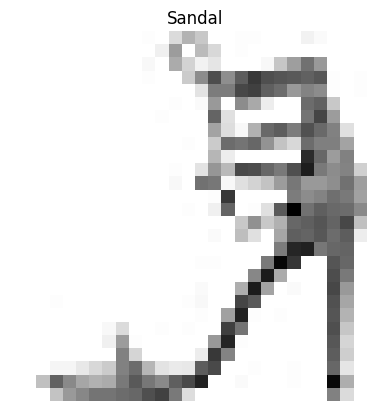

In [38]:
plot_image(X_train, y_train, 65)


# Create the Model Using Sequential API

In [23]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


## Explaination of the dense layers added in the above sequential call to Keras.

The first line creates a Sequential model. Simple and easy; they may only express models with a single input and a single output via a simple stack of layers.

The FLATTEN layer is built into the model first. Its role is to flatten the image into a 1D array for preprocessing purposes (think grayscaling). As the first layer, one should specify the input shape, which doesn't include the batch size, only the shape of instances.

Next, we add a DENSE layer with 300 neurons. Each Desnse layer manages its own weight matrix, containing all the connectino weights between the neurons and their inputs. 

We then add another DENSE layer with 100 neurons to further funnel the outputs.

Last, we add a DENSE output layher with 10 neurons (ONE per CLASS) using the softmax function (because the classes are EXCLUSIVE).

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 300)               235500    
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Note that Dense layers (unlike what playground.tensorflow.org may have impressed), DENSE layers tend to have a LOT of parameters. 

In this case, the first layer has *784 (pixel matrixes) x 300* connection weights (per neuron), plus *300 bias terms* (per neuron), which end up to *235,500 parameters*. This gives us much flexibility but risks overfitting.

In [9]:
model.layers

You can get a model's list of layers, to fetch a layer by index, or you can fetch it by name.

In [10]:
hidden1 = model.layers[1]

In [11]:
hidden1.name

'dense'

In [12]:
model.layers

In [13]:
model.get_layer('dense') is hidden1

True

All parameters of a layer can be accessed by using its 'get_weights()' and 'set_weights' functions. For Dense layers, this includes both the connection weights and the bias terms.

In [14]:
weights, biases = hidden1.get_weights()

In [15]:
weights

array([[ 0.02628436,  0.04720265, -0.04988605, ..., -0.02518456,
        -0.01411444,  0.05005021],
       [-0.0737138 ,  0.05982858,  0.02964027, ..., -0.00899572,
         0.02004835, -0.02801224],
       [-0.06259815, -0.07231557,  0.03151134, ..., -0.05643141,
        -0.0598775 , -0.03227009],
       ...,
       [-0.01081447, -0.0313146 , -0.05540809, ...,  0.03151712,
         0.03236504,  0.00708149],
       [ 0.05375893, -0.04831101,  0.01508406, ...,  0.04355938,
        -0.05145774,  0.06945927],
       [ 0.06029373, -0.06003013, -0.06395859, ...,  0.07131007,
        -0.0095082 ,  0.04314893]], dtype=float32)

In [16]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [17]:
weights.shape

(784, 300)

In [18]:
biases.shape

(300,)

After creating a model, you must call its compile() method to specify the loss function and the optimizer to use. Optionally, you can also specify a list of extra metrics to compute during training and evaluation:

In [41]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

# Training and Evaluation
# TODO - EXPLAINATION

In [42]:
# Training and Evaluation
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7138 - accuracy: 0.7684 - val_loss: 0.4941 - val_accuracy: 0.8362
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4832 - accuracy: 0.8317 - val_loss: 0.4545 - val_accuracy: 0.8424
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4383 - accuracy: 0.8460 - val_loss: 0.4285 - val_accuracy: 0.8488
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4106 - accuracy: 0.8568 - val_loss: 0.3966 - val_accuracy: 0.8630
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3913 - accuracy: 0.8620 - val_loss: 0.3776 - val_accuracy: 0.8694
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3754 - accuracy: 0.8678 - val_loss: 0.3715 - val_accuracy: 0.8692
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3625 - accuracy: 0.8723 - val_loss: 0.3950 - val_accuracy:

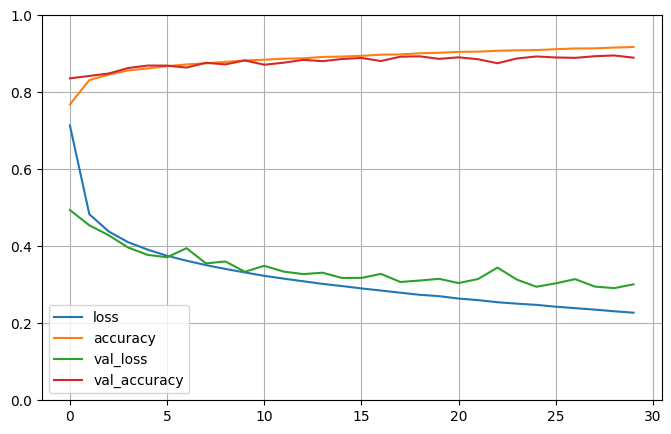

In [43]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# TODO - EXPLAINATION for above